# Implement a KNN model to classify the animals in to category

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

## Import the dataset 

In [2]:
data = pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## EDA 

In [3]:
data.shape

(101, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
data.type.value_counts().sort_values(ascending=False)

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [7]:
data.drop('animal name', axis=1, inplace=True)

In [8]:
data.shape

(101, 17)

## Splitting the dataset 

In [9]:
X = data.iloc[:, :-1]
y = data.loc[:, 'type']

## Feature Scaling

In [10]:
#No need, since the dataset is already in similar scale!!

## Model Building 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, stratify=y, test_size=0.3)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 16), (31, 16), (70,), (31,))

### Building Model with K = 5

In [13]:
knn_mod = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

## Model Training & Evaluation 

In [14]:
knn_mod.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred_train = knn_mod.predict(X_train)

In [16]:
accuracy_score(y_train, y_pred_train)

0.9

In [17]:
confusion_matrix(y_train, y_pred_train)

array([[28,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  2,  1,  1,  3]], dtype=int64)

In [18]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        14
           3       0.00      0.00      0.00         3
           4       0.69      1.00      0.82         9
           5       0.75      1.00      0.86         3
           6       0.86      1.00      0.92         6
           7       1.00      0.43      0.60         7

    accuracy                           0.90        70
   macro avg       0.75      0.78      0.74        70
weighted avg       0.88      0.90      0.87        70



## Model Testing & Evaluation

In [19]:
y_pred_test = knn_mod.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred_test).round(3)

0.871

In [21]:
confusion_matrix(y_test, y_pred_test)

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  2,  0,  0,  1]], dtype=int64)

In [22]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.57      1.00      0.73         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      0.33      0.50         3

    accuracy                           0.87        31
   macro avg       0.72      0.76      0.70        31
weighted avg       0.86      0.87      0.84        31



### The accuracy of the model when K=5 for test data is 87%. Let's try with K=7 and check the accuracy. 

### Building Model with K = 7

In [23]:
knn_mod2 = KNeighborsClassifier(n_neighbors=7, metric='minkowski')

## Model Training & Evaluation 

In [24]:
knn_mod2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [25]:
y_pred_train = knn_mod2.predict(X_train)

In [26]:
accuracy_score(y_train, y_pred_train).round(3)

0.871

In [27]:
confusion_matrix(y_train, y_pred_train)

array([[26,  0,  0,  2,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0],
       [ 1,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  2,  0,  1,  4]], dtype=int64)

In [28]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        28
           2       1.00      1.00      1.00        14
           3       0.00      0.00      0.00         3
           4       0.60      1.00      0.75         9
           5       1.00      0.67      0.80         3
           6       0.86      1.00      0.92         6
           7       1.00      0.57      0.73         7

    accuracy                           0.87        70
   macro avg       0.77      0.74      0.73        70
weighted avg       0.86      0.87      0.85        70



## Model Testing & Evaluation

In [29]:
y_pred_test = knn_mod2.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred_test).round(3)

0.839

In [31]:
confusion_matrix(y_test, y_pred_test)

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  2,  0,  1,  0]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.57      1.00      0.73         4
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         3

    accuracy                           0.84        31
   macro avg       0.60      0.71      0.64        31
weighted avg       0.73      0.84      0.78        31



### The accuracy of the model when K=7 for test data drops down to 84%. Let's try with K=3 and check the accuracy. 

### When K = 3

In [33]:
knn_mod3 = KNeighborsClassifier(n_neighbors=3, metric='minkowski')

## Model Training & Evaluation 

In [34]:
knn_mod3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred_train = knn_mod3.predict(X_train)

In [36]:
accuracy_score(y_train, y_pred_train).round(3)

0.957

In [37]:
confusion_matrix(y_train, y_pred_train)

array([[28,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  1,  6]], dtype=int64)

In [38]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        14
           3       1.00      0.33      0.50         3
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00         3
           6       0.86      1.00      0.92         6
           7       1.00      0.86      0.92         7

    accuracy                           0.96        70
   macro avg       0.96      0.88      0.90        70
weighted avg       0.96      0.96      0.95        70



## Model Testing & Evaluation

In [39]:
y_pred_test = knn_mod3.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred_test).round(3)

0.935

In [41]:
confusion_matrix(y_test, y_pred_test)

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [42]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.80      1.00      0.89         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.94        31
   macro avg       0.76      0.86      0.79        31
weighted avg       0.89      0.94      0.91        31



### The accuracy of the model when K=3 for test data increased to 94%. Let's try to find the optimal value for K and check the accuracy. 

## Let's find the optimal value for K with highest accuracy & cv_score using Loop 

#### Highest accuracy with k-neighbours 

In [43]:
r = range(1,21,2)
nn = []
for k in r:
    knn_mod4 = KNeighborsClassifier(n_neighbors=k)
    knn_mod4.fit(X_train, y_train)
    y_pred_test = knn_mod4.predict(X_test)
    scores = accuracy_score(y_test, y_pred_test).round(3)
    nn.append(scores)
dd = pd.DataFrame(data={'Kvalue':r, 'Score':nn})
dd

,Kvalue,Score
0,1,0.968
1,3,0.935
2,5,0.871
3,7,0.839
4,9,0.806
5,11,0.806
6,13,0.806
7,15,0.806
8,17,0.806
9,19,0.806


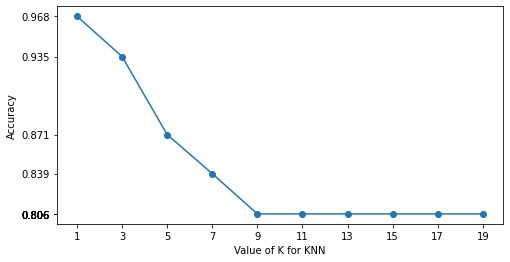

In [44]:
#plotting the visualisation for accuracy_score
plt.figure(figsize=(8,4))
plt.plot(r, nn, marker ="o")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.xticks(r)
plt.yticks(nn)
plt.show()

#### Highest cv_score & std_dev with k-neighbours 

In [45]:
r = range(1,21,2)
nn = []
for k in r:
    knn_mod5 = KNeighborsClassifier(n_neighbors=k)
    scores   = cross_val_score(knn_mod5, X, y, cv=5)
    cv_score_mean = scores.mean().round(3)
    cv_score_std  = scores.std().round(3)
    nn.append(cv_score_mean)
dd = pd.DataFrame(data={'Kvalue':r, 'Score':nn, 'Std_dev':cv_score_std})
dd

,Kvalue,Score,Std_dev
0,1,0.970,0.026
1,3,0.930,0.026
2,5,0.851,0.026
3,7,0.841,0.026
4,9,0.792,0.026
5,11,0.782,0.026
6,13,0.782,0.026
7,15,0.782,0.026
8,17,0.782,0.026
9,19,0.782,0.026


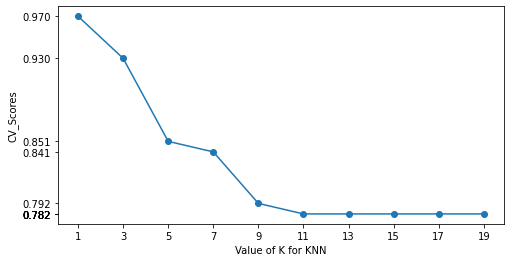

In [46]:
#plotting the visualisation for cv_score
plt.figure(figsize=(8,4))
plt.plot(r, nn, marker ="o")
plt.xlabel('Value of K for KNN')
plt.ylabel('CV_Scores')
plt.xticks(r)
plt.yticks(nn)
plt.show()

### Finalising Model

In [47]:
knn_mod5 = KNeighborsClassifier(n_neighbors=1)
knn_mod5.fit(X_train, y_train)
y_pred_test = knn_mod5.predict(X_test)

In [48]:
confusion_matrix(y_test, y_pred_test)

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

In [49]:
accuracy_score(y_test, y_pred_test).round(2)

0.97

### Conclusion: The overall accuracy for model 5 is 97% and also std dev is approx 2.6% for the model. Hence, we can consider model 5 for the dataset, since it has high accuracy and also low std deviation. 